In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Rand Walk (1D)
We start at y=0 and walk forward in equidistant, sucessive steps with equal probaility...

In [7]:
# Define parameters for the walk
dims = 1 #dimensions
step_n = 10000 #number of steps
step_set = [-1, 0, 1] #range from which to sample
origin = np.zeros((1,dims)) #origin of random walker

# Simulate steps in 1D 
# this simply done as a vector of random numbers which accumulated by the cumsum (cumulated sum)
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]


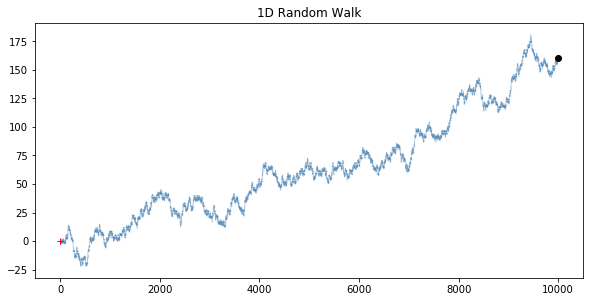

In [8]:
# Plot the path
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.scatter(np.arange(step_n+1), path, c='steelblue',alpha=0.25,s=0.05);
ax.plot(path,c='steelblue',alpha=0.5,lw=0.5);
ax.plot(0, start, c='r', marker='+')
ax.plot(step_n, stop, c='k', marker='o')
plt.title('1D Random Walk')
plt.tight_layout(pad=0)


### Random Walk (2D)
The same as above but in the 2D pane. We let the random walker draw two random numbers -- one for each dimension.

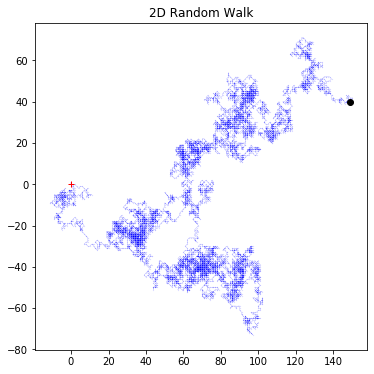

In [10]:
# Define parameters for the walk
dims = 2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25);
ax.plot(start[:,0], start[:,1],c='r', marker='+')
ax.plot(stop[:,0], stop[:,1],c='k', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)


The same can be doen in further dimensions. And we can use several random walkers...

Here is one example using some turtles:

In [5]:
from turtle import *
import random

turtles = 5
delay(0)
screensize(500,500)

class walker():
    def __init__(self, colo, pos):
        self.pos = pos
        self.tur = Turtle()
        self.tur.shape('turtle')
        self.tur.setpos(pos)
        self.tur.speed(30)
        self.tur.color(colo)
        self.tur.penup()
        self.tur.setheading(90)
 
    def walking(self):   
        choice = np.random.randint(4, size=1)[0]
        actionofchoice = [(self.pos[0]+5, self.pos[1]), (self.pos[0], self.pos[1]+5), (self.pos[0]-5, self.pos[1]), (self.pos[0], self.pos[1]-5)]
        headsup = [90, 180, 270, 360]
        self.pos = actionofchoice[choice]
        self.tur.right(headsup[choice])
        self.tur.pendown()
        self.tur.goto(self.pos)
        

def starttowalk():
    allwalker = []
    colors = ['red','yellow','mediumturquoise','blue','orange']
    for x in range(turtles):
        allwalker.append(walker(colors[x], (0,0)))
        allwalker[x].tur.showturtle()

    while True:
        for x in allwalker:
            x.walking()


In [7]:
#let the turtles run... stop by simply closing the new window 
starttowalk()

### Example using a flow field
This is a demo of the dorado package https://passah2o.github.io/dorado/index.html which is developed to simulate the transport of particles in a flow field.

 12%|#2        | 12/98 [00:00<00:00, 114.20it/s]

Gamma parameter not specified - using 0.05
Diffusion coefficient not specified - using 0.2
minimum depth for wetness not defined - using 10 cm
Cell Types not specified - Estimating from depth
Using weighted random walk
Calculating routing weights ...


100%|##########| 98/98 [00:00<00:00, 108.75it/s]


Finished routing weight calculation.


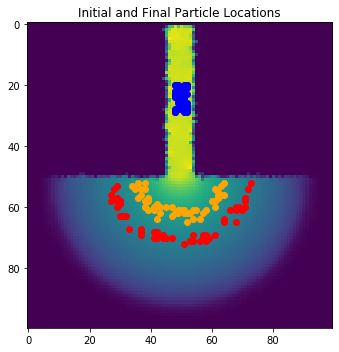

In [11]:
from dorado.example_data.define_params import make_anuga_params
from dorado.particle_track import Particles
import dorado as pr

np.random.seed(1)  # make result consistent for docs
params = make_anuga_params()
particles = Particles(params)
seed_xloc = list(range(20, 30))
seed_yloc = list(range(48, 53))
Np_tracer = 50
particles.generate_particles(Np_tracer, seed_xloc, seed_yloc)
walk_data = particles.run_iteration(target_time=2100)
plt.figure(figsize=(8, 5))
pr.routines.plot_state(particles.depth, walk_data, iteration=0, c='b')
pr.routines.plot_state(particles.depth, walk_data, iteration=-1, c='r')
pr.routines.plot_state(particles.depth, walk_data, iteration=-10, c='orange')
plt.title('Initial and Final Particle Locations')
plt.tight_layout()
plt.show()

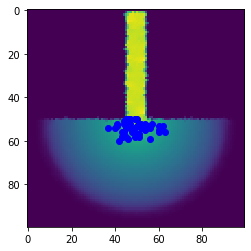

In [14]:
#here you can plot specific iterations to get a feeling of the process
pr.routines.plot_state(particles.depth, walk_data, iteration=33, c='b')